# Problem2:
A company performed a survey to understand the income of households in various neighbourhoods of a country. The data dictionary is also present. You can access the data dictionary from the following file Income_Data Dictionary. Please refer to the following data set to solve the problem Income.csv. 

['FamilyIncome' is the target variable]

In [2]:
# import necessary libraries
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as sc 
import statsmodels.api as sm
import sklearn.metrics as metrics

In [3]:
# use to set style of background of plot
sns.set(style="whitegrid")

In [4]:
## load dataset
df = pd.read_csv("income.csv")

In [5]:
# create the copy of the dataset for a backup
data = df.copy()

In [6]:
# top 5 rows
df.head()

,WorkingHoursWife,WifeAge,EducationWife,WifeHourEarnings,WifeWage,WorkingHoursHusband,HusbandAge,EducationHusband,HusbandWage,EducationWifeMother,EducationWifeFather,UnemploymentRate,WifeExperience,FamilyIncome
0,1610,32,12,3.3540,2.65,2708,34,12,4.0288,12,7,5.0,14,16310
1,1656,30,12,1.3889,2.65,2310,30,9,8.4416,7,7,11.0,5,21800
2,1980,35,12,4.5455,4.04,3072,40,12,3.5807,12,7,5.0,15,21040
3,456,34,12,1.0965,3.25,1920,53,10,3.5417,7,7,5.0,6,7300
4,1568,31,14,4.5918,3.60,2000,32,12,10.0000,12,14,9.5,7,27300


## 2.1) Perform exploratory data analysis on the dataset. Showcase some charts, graphs.

In [7]:
df.shape
print('The number of columns (variables) in the dataframe is',df.shape[1],'\n'
    ,'The number of rows (observations per variable) in the dataframe is',df.shape[0])

The number of columns (variables) in the dataframe is 14 
 The number of rows (observations per variable) in the dataframe is 753


In [8]:
# information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 753 entries, 0 to 752
Data columns (total 14 columns):
WorkingHoursWife       753 non-null int64
WifeAge                753 non-null int64
EducationWife          753 non-null int64
WifeHourEarnings       753 non-null float64
WifeWage               753 non-null float64
WorkingHoursHusband    753 non-null int64
HusbandAge             753 non-null int64
EducationHusband       753 non-null int64
HusbandWage            753 non-null float64
EducationWifeMother    753 non-null int64
EducationWifeFather    753 non-null int64
UnemploymentRate       753 non-null float64
WifeExperience         753 non-null int64
FamilyIncome           753 non-null int64
dtypes: float64(4), int64(10)
memory usage: 82.5 KB


__Insight1:__ all the variables are __numerical__.

In [9]:
## check is there any null data in the dataset
df.isnull().sum()

WorkingHoursWife       0
WifeAge                0
EducationWife          0
WifeHourEarnings       0
WifeWage               0
WorkingHoursHusband    0
HusbandAge             0
EducationHusband       0
HusbandWage            0
EducationWifeMother    0
EducationWifeFather    0
UnemploymentRate       0
WifeExperience         0
FamilyIncome           0
dtype: int64

__Insight2:__ There is __no null values__ in the dataset.

In [10]:
# this will help to summarise the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
WorkingHoursWife,753.0,740.576361,871.314216,0.0000,0.0000,288.0000,1516.0000,4950.000
WifeAge,753.0,42.537849,8.072574,30.0000,36.0000,43.0000,49.0000,60.000
EducationWife,753.0,12.286853,2.280246,5.0000,12.0000,12.0000,13.0000,17.000
WifeHourEarnings,753.0,2.374565,3.241829,0.0000,0.0000,1.6250,3.7879,25.000
WifeWage,753.0,1.849734,2.419887,0.0000,0.0000,0.0000,3.5800,9.980
WorkingHoursHusband,753.0,2267.270916,595.566649,175.0000,1928.0000,2164.0000,2553.0000,5010.000
HusbandAge,753.0,45.120850,8.058793,30.0000,38.0000,46.0000,52.0000,60.000
EducationHusband,753.0,12.491368,3.020804,3.0000,11.0000,12.0000,15.0000,17.000
HusbandWage,753.0,7.482179,4.230559,0.4121,4.7883,6.9758,9.1667,40.509
EducationWifeMother,753.0,9.250996,3.367468,0.0000,7.0000,10.0000,12.0000,17.000


__Insight3:__ By looking at the dataset, looks like there are outliers in the variables.

Further,
1. WorkingHoursWife      (there are 325 rows with 0 values) "looks like these are housewives"
2. WifeHourEarnings      (there are 325 rows with 0 values) "looks like these are housewives"
2. WifeWage              (there are 417 rows with 0 values) "looks like these are housewives"

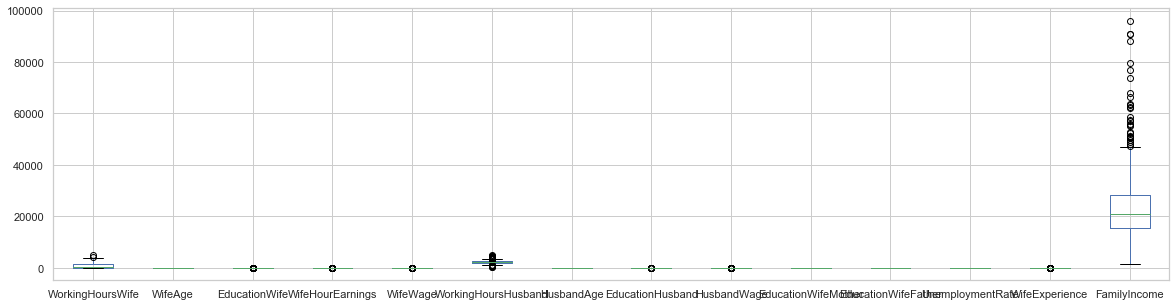

In [11]:
# box plot view of the dataset.
df.boxplot(figsize=(20,5))

__Insight4:__ By looking at the dataset, there are below 9 variables out of total 14 has the outliers.

1. WorkingHoursWife
2. EducationWife
3. WifeHoursEarnings
4. WifeWage
5. WorkingHoursHusband
6. EducationHusband
7. HusbandWage
8. WifeExperience
9. FamilyIncome

#### EDA (Data Transformation / Data Standardisation)

#### To get rid of this issue, lets convert all the variables into standard scale using zscore method

In [12]:
from scipy.stats import zscore
df_scaled=df.apply(zscore)
df_scaled.head()

,WorkingHoursWife,WifeAge,EducationWife,WifeHourEarnings,WifeWage,WorkingHoursHusband,HusbandAge,EducationHusband,HusbandWage,EducationWifeMother,EducationWifeFather,UnemploymentRate,WifeExperience,FamilyIncome
0,0.998493,-1.306257,-0.125883,0.302325,0.330924,0.740508,-1.380882,-0.162769,-0.816836,0.816884,-0.506669,-1.164042,0.417818,-0.555782
1,1.051322,-1.554174,-0.125883,-0.304248,0.330924,0.071793,-1.877564,-1.156543,0.226934,-0.668898,-0.506669,0.763443,-0.698285,-0.105121
2,1.423422,-0.934381,-0.125883,0.670109,0.905712,1.352097,-0.635859,-0.162769,-0.922827,0.816884,-0.506669,-1.164042,0.541830,-0.167508
3,-0.326823,-1.058339,-0.125883,-0.394504,0.579034,-0.583481,0.978358,-0.825285,-0.932051,-0.668898,-0.506669,-1.164042,-0.574274,-1.295391
4,0.950258,-1.430215,0.751799,0.684400,0.723765,-0.449066,-1.629223,-0.162769,0.595547,0.816884,1.454161,0.281572,-0.450262,0.346361


In [13]:
df.to_excel('Income_Zscore.xlsx')

In [14]:
df = df_scaled

In [15]:
data = df.copy()

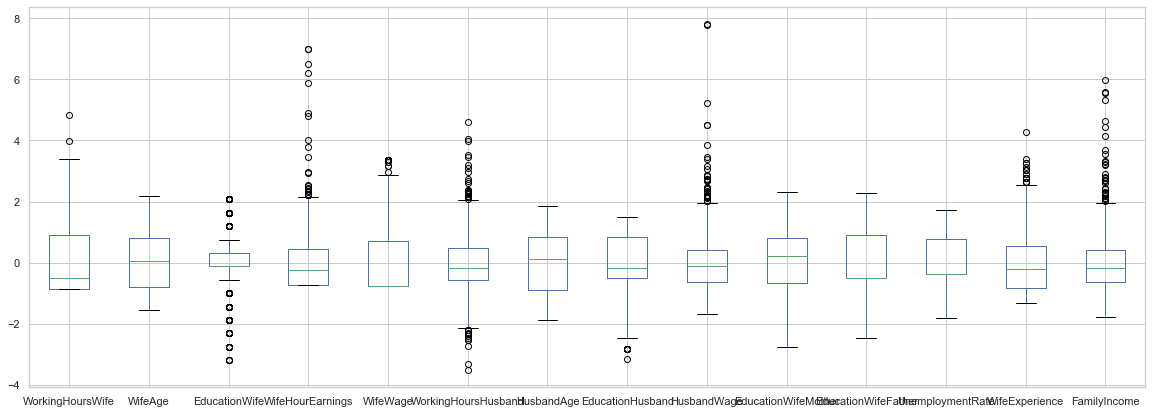

In [16]:
# box plot view of the dataset. (after data transformation)
df.boxplot(figsize=(20,7))

__Insight5:__ After data scaling (using zscore), outliers are clearly visibile in the dataset.

#### EDA (Outliers - RETAIN)

Let's retain the __outliers (replace the zvalues more than 3 with "3" and less than -3 with "-3")__ for all the variables.

In [17]:
df.shape

(753, 14)

In [18]:
# 1. identify the outliers from the FamilyIncome and replace the same with 3 or -3. 
df.loc[(df.FamilyIncome >3.0),'FamilyIncome']=3
df.loc[(df.FamilyIncome <-3.0),'FamilyIncome']=-3

# 2. identify the outliers from the WorkingHoursWife and replace the same with 3 or -3. 
df.loc[(df.WorkingHoursWife >3.0),'WorkingHoursWife']=3
df.loc[(df.WorkingHoursWife <-3.0),'WorkingHoursWife']=-3

# 3. identify the outliers from the WifeAge and replace the same with 3 or -3. 
df.loc[(df.WifeAge >3.0),'WifeAge']=3
df.loc[(df.WifeAge <-3.0),'WifeAge']=-3

# 4. identify the outliers from the EducationWife and replace the same with 3 or -3. 
df.loc[(df.EducationWife >3.0),'EducationWife']=3
df.loc[(df.EducationWife <-3.0),'EducationWife']=-3

# 5. identify the outliers from the WifeHourEarnings and replace the same with 3 or -3. 
df.loc[(df.WifeHourEarnings >3.0),'WifeHourEarnings']=3
df.loc[(df.WifeHourEarnings <-3.0),'WifeHourEarnings']=-3

# 6. identify the outliers from the WifeWage and replace the same with 3 or -3. 
df.loc[(df.WifeWage >3.0),'WifeWage']=3
df.loc[(df.WifeWage <-3.0),'WifeWage']=-3

# 7. identify the outliers from the WorkingHoursHusband and replace the same with 3 or -3. 
df.loc[(df.WorkingHoursHusband >3.0),'WorkingHoursHusband']=3
df.loc[(df.WorkingHoursHusband <-3.0),'WorkingHoursHusband']=-3

# 8. identify the outliers from the HusbandAge and replace the same with 3 or -3. 
df.loc[(df.HusbandAge >3.0),'HusbandAge']=3
df.loc[(df.HusbandAge <-3.0),'HusbandAge']=-3

# 9. identify the outliers from the EducationHusband and replace the same with 3 or -3. 
df.loc[(df.EducationHusband >3.0),'EducationHusband']=3
df.loc[(df.EducationHusband <-3.0),'EducationHusband']=-3

# 10. identify the outliers from the HusbandWage and replace the same with 3 or -3. 
df.loc[(df.HusbandWage >3.0),'HusbandWage']=3
df.loc[(df.HusbandWage <-3.0),'HusbandWage']=-3

# 11. identify the outliers from the EducationWifeMother and replace the same with 3 or -3. 
df.loc[(df.EducationWifeMother >3.0),'EducationWifeMother']=3
df.loc[(df.EducationWifeMother <-3.0),'EducationWifeMother']=-3

# 12. identify the outliers from the EducationWifeFather and replace the same with 3 or -3. 
df.loc[(df.EducationWifeFather >3.0),'EducationWifeFather']=3
df.loc[(df.EducationWifeFather <-3.0),'EducationWifeFather']=-3

# 13. identify the outliers from the UnemploymentRate and replace the same with 3 or -3. 
df.loc[(df.UnemploymentRate >3.0),'UnemploymentRate']=3
df.loc[(df.UnemploymentRate <-3.0),'UnemploymentRate']=-3

# 14. identify the outliers from the WifeExperience and replace the same with 3 or -3. 
df.loc[(df.WifeExperience >3.0),'WifeExperience']=3
df.loc[(df.WifeExperience <-3.0),'WifeExperience']=-3

df

,WorkingHoursWife,WifeAge,EducationWife,WifeHourEarnings,WifeWage,WorkingHoursHusband,HusbandAge,EducationHusband,HusbandWage,EducationWifeMother,EducationWifeFather,UnemploymentRate,WifeExperience,FamilyIncome
0,0.998493,-1.306257,-0.125883,0.302325,0.330924,0.740508,-1.380882,-0.162769,-0.816836,0.816884,-0.506669,-1.164042,0.417818,-0.555782
1,1.051322,-1.554174,-0.125883,-0.304248,0.330924,0.071793,-1.877564,-1.156543,0.226934,-0.668898,-0.506669,0.763443,-0.698285,-0.105121
2,1.423422,-0.934381,-0.125883,0.670109,0.905712,1.352097,-0.635859,-0.162769,-0.922827,0.816884,-0.506669,-1.164042,0.541830,-0.167508
3,-0.326823,-1.058339,-0.125883,-0.394504,0.579034,-0.583481,0.978358,-0.825285,-0.932051,-0.668898,-0.506669,-1.164042,-0.574274,-1.295391
4,0.950258,-1.430215,0.751799,0.684400,0.723765,-0.449066,-1.629223,-0.162769,0.595547,0.816884,1.454161,0.281572,-0.450262,0.346361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
748,-0.850518,-0.314588,0.312958,-0.732964,-0.764897,1.264727,-0.263347,1.162261,0.423233,0.222571,0.333687,0.281572,-0.698285,0.420240
749,-0.850518,-1.430215,-0.125883,-0.732964,-0.764897,-0.354975,-1.505052,-0.162769,-0.619332,0.816884,0.893924,-0.360924,0.417818,-1.073755
750,-0.850518,0.057288,-0.125883,-0.732964,-0.764897,0.194447,-0.263347,-0.162769,-1.512005,0.222571,-1.627143,-0.360924,-0.822297,-1.077695
751,-0.850518,2.164583,-0.125883,-0.732964,-0.764897,-0.944722,1.226699,-1.487800,1.172686,0.816884,0.893924,1.727185,0.541830,0.156246


__Insight6:__ After RETAIN & REPLACE outliers, dataset have replaced from __58 rows to 3 or -3 (i.e. 8% data)__

In [19]:
df.to_excel('Check.xlsx')

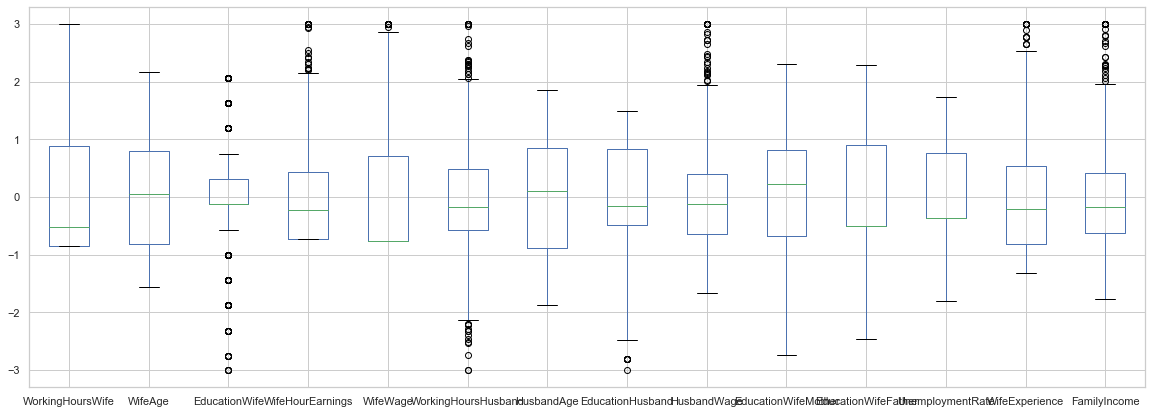

In [20]:
# box plot view of the dataset. (after removing outliers) (data range is between -3 to 3)
df.boxplot(figsize=(20,7))

Text(0.5, 1.0, 'FamilyIncome distribution')

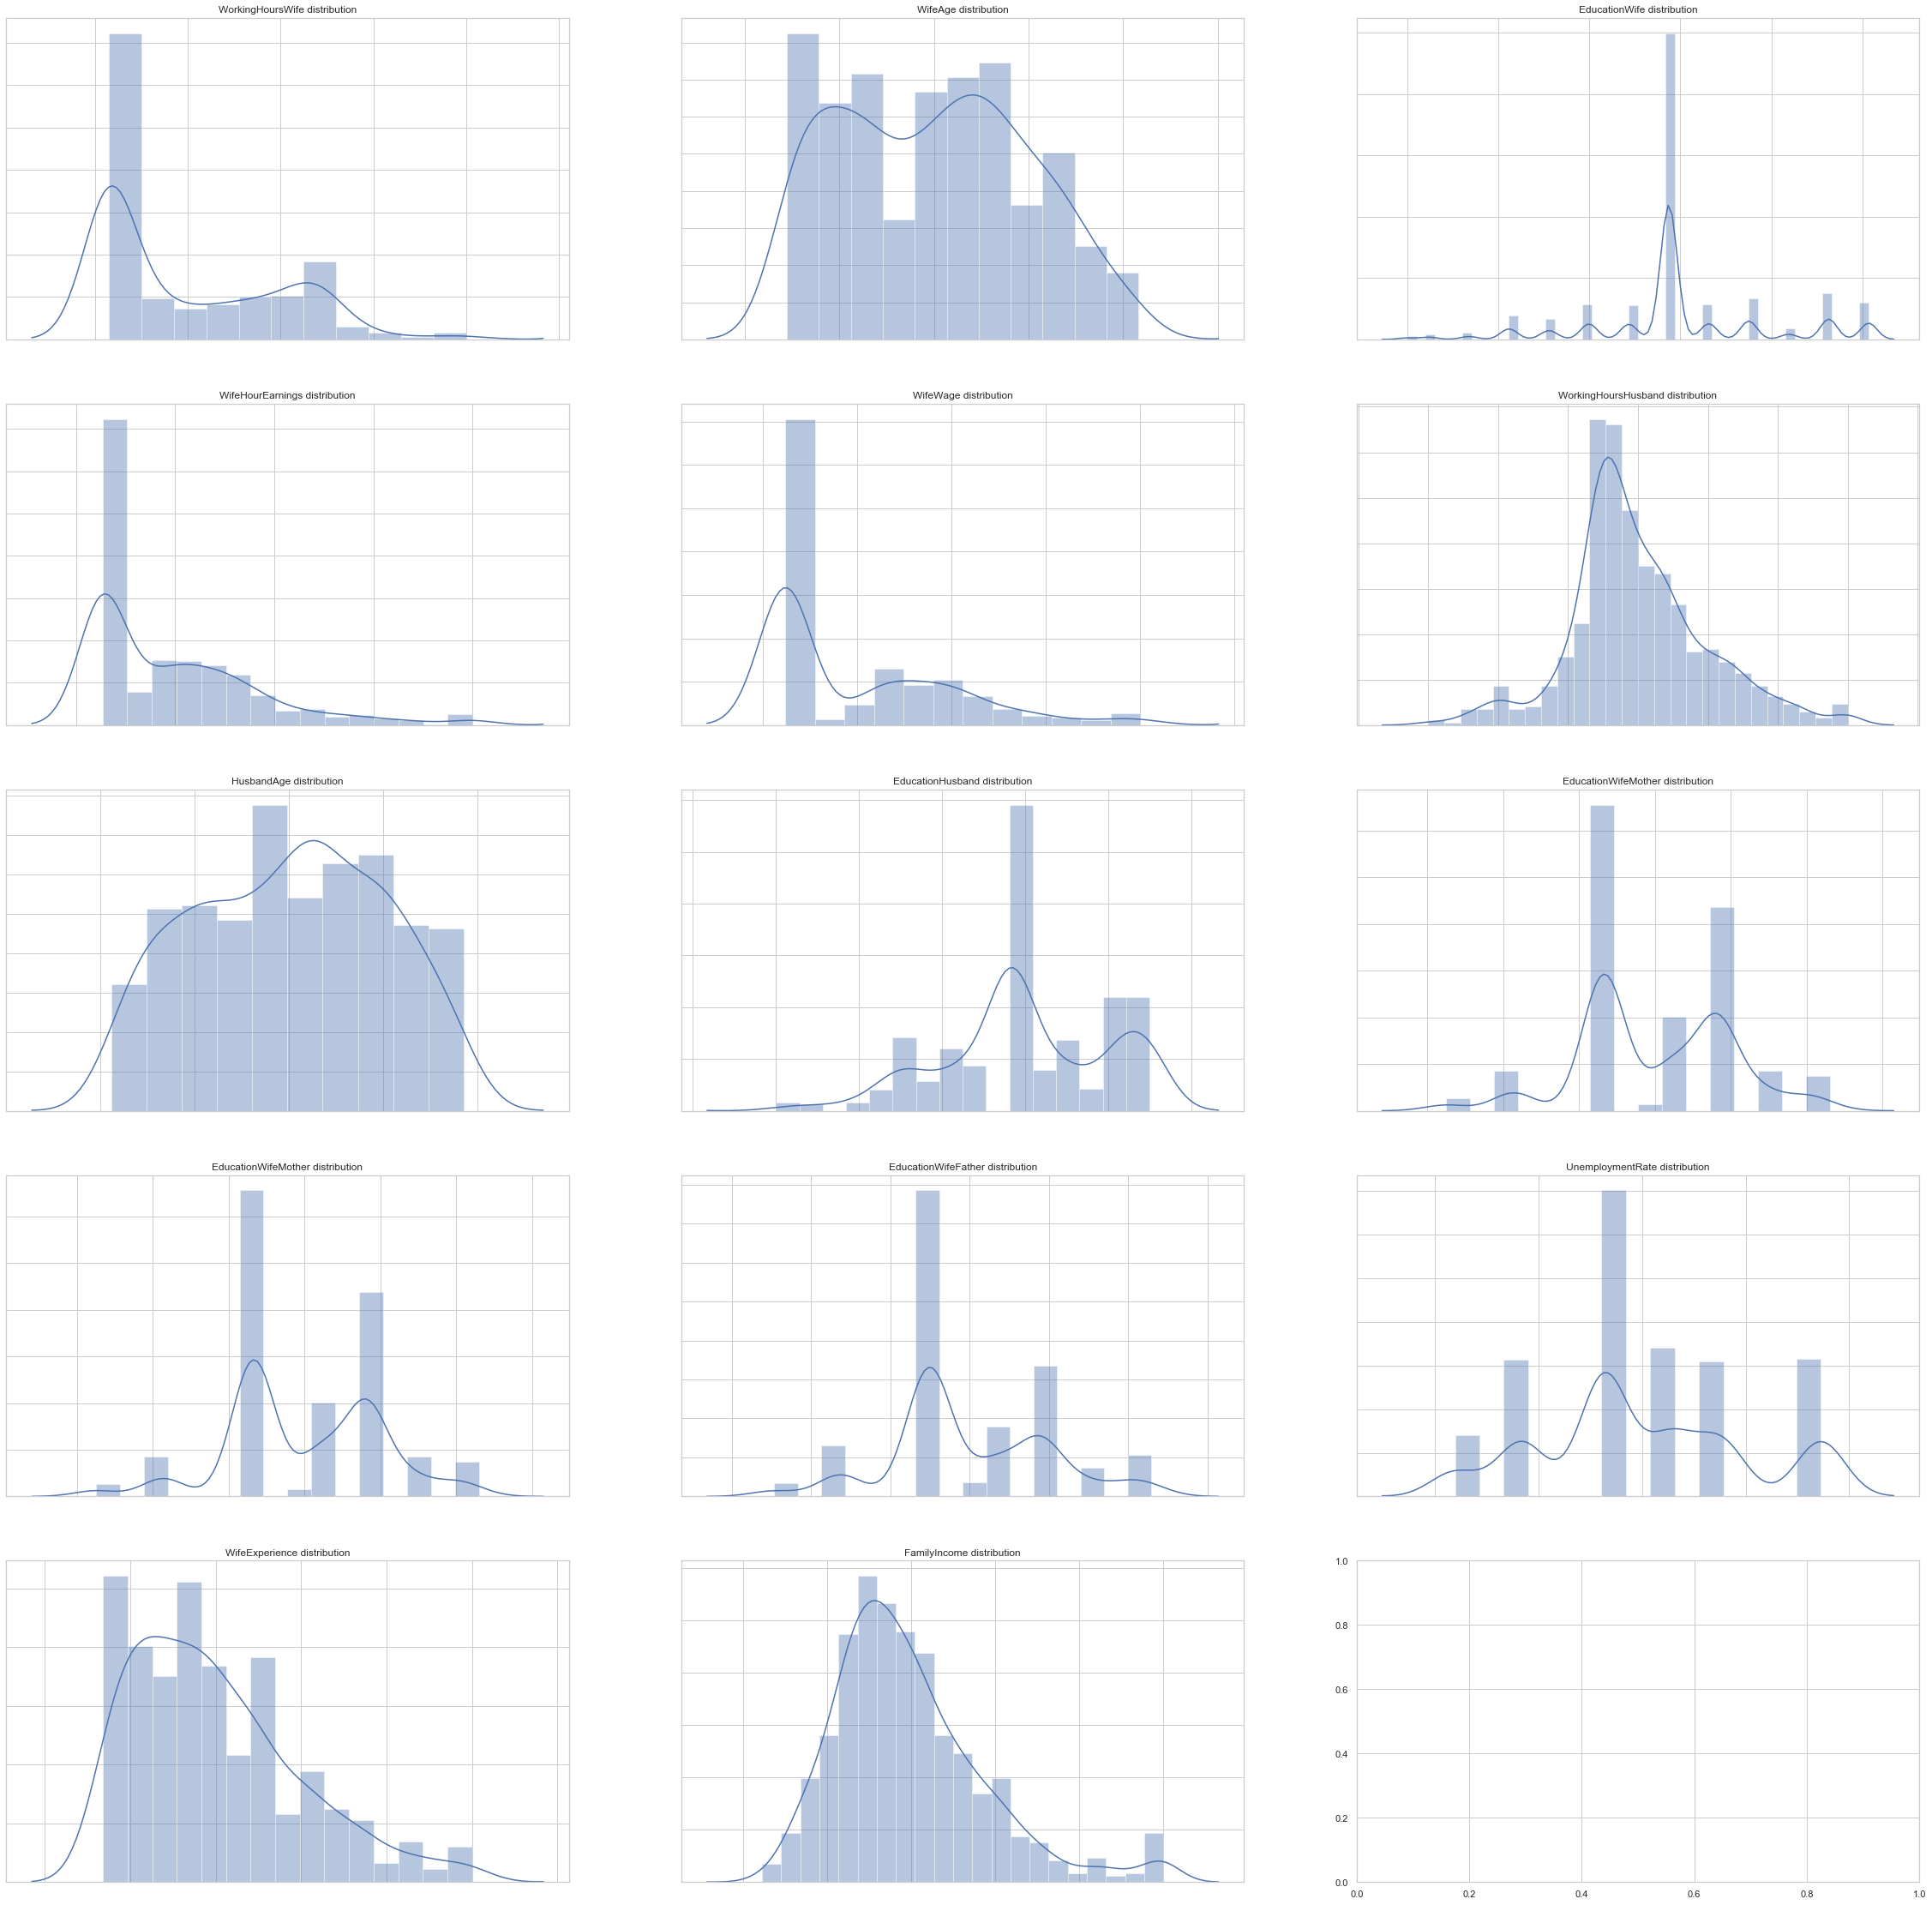

In [21]:
# histogram for all 14 the variables

fig,axes =  plt.subplots(5,3)
fig.set_size_inches(40,40)

x = df['WorkingHoursWife']

a = sns.distplot(x, ax = axes[0][0])
a.set(xlabel=None)
a.set(ylabel=None)
a.set(xticklabels=[])
a.set(yticklabels=[])
a.set_title('WorkingHoursWife distribution',fontsize = 12)

y = df['WifeAge']

a = sns.distplot(y, ax = axes[0][1])
a.set(xlabel=None)
a.set(ylabel=None)
a.set(xticklabels=[])
a.set(yticklabels=[])
a.set_title('WifeAge distribution',fontsize = 12)

z = df['EducationWife']

a = sns.distplot(z, ax = axes[0][2])
a.set(xlabel=None)
a.set(ylabel=None)
a.set(xticklabels=[])
a.set(yticklabels=[])
a.set_title('EducationWife distribution',fontsize = 12)

x1 = df['WifeHourEarnings']

a = sns.distplot(x1, ax = axes[1][0])
a.set(xlabel=None)
a.set(ylabel=None)
a.set(xticklabels=[])
a.set(yticklabels=[])
a.set_title('WifeHourEarnings distribution',fontsize = 12)

y1 = df['WifeWage']

a = sns.distplot(y1, ax = axes[1][1])
a.set(xlabel=None)
a.set(ylabel=None)
a.set(xticklabels=[])
a.set(yticklabels=[])
a.set_title('WifeWage distribution',fontsize = 12)

z1 = df['WorkingHoursHusband']

a = sns.distplot(z1, ax = axes[1][2])
a.set(xlabel=None)
a.set(ylabel=None)
a.set(xticklabels=[])
a.set(yticklabels=[])
a.set_title('WorkingHoursHusband distribution',fontsize = 12)

x2 = df['HusbandAge']

a = sns.distplot(x2, ax = axes[2][0])
a.set(xlabel=None)
a.set(ylabel=None)
a.set(xticklabels=[])
a.set(yticklabels=[])
a.set_title('HusbandAge distribution',fontsize = 12)

y2 = df['EducationHusband']

a = sns.distplot(y2, ax = axes[2][1])
a.set(xlabel=None)
a.set(ylabel=None)
a.set(xticklabels=[])
a.set(yticklabels=[])
a.set_title('EducationHusband distribution',fontsize = 12)

z2 = df['EducationWifeMother']

a = sns.distplot(z2, ax = axes[2][2])
a.set(xlabel=None)
a.set(ylabel=None)
a.set(xticklabels=[])
a.set(yticklabels=[])
a.set_title('EducationWifeMother distribution',fontsize = 12)

x3 = df['EducationWifeMother']

a = sns.distplot(x3, ax = axes[3][0])
a.set(xlabel=None)
a.set(ylabel=None)
a.set(xticklabels=[])
a.set(yticklabels=[])
a.set_title('EducationWifeMother distribution',fontsize = 12)

y3 = df['EducationWifeFather']

a = sns.distplot(y3, ax = axes[3][1])
a.set(xlabel=None)
a.set(ylabel=None)
a.set(xticklabels=[])
a.set(yticklabels=[])
a.set_title('EducationWifeFather distribution',fontsize = 12)

z3 = df['UnemploymentRate']

a = sns.distplot(z3, ax = axes[3][2])
a.set(xlabel=None)
a.set(ylabel=None)
a.set(xticklabels=[])
a.set(yticklabels=[])
a.set_title('UnemploymentRate distribution',fontsize = 12)

x4 = df['WifeExperience']

a = sns.distplot(x4, ax = axes[4][0])
a.set(xlabel=None)
a.set(ylabel=None)
a.set(xticklabels=[])
a.set(yticklabels=[])
a.set_title('WifeExperience distribution',fontsize = 12)

y4 = df['FamilyIncome']

a = sns.distplot(y4, ax = axes[4][1])
a.set(xlabel=None)
a.set(ylabel=None)
a.set(xticklabels=[])
a.set(yticklabels=[])
a.set_title('FamilyIncome distribution',fontsize = 12)

__Insight7:__ By looking at the dataset, there are mix of distrbution pattern found amongst the variables.

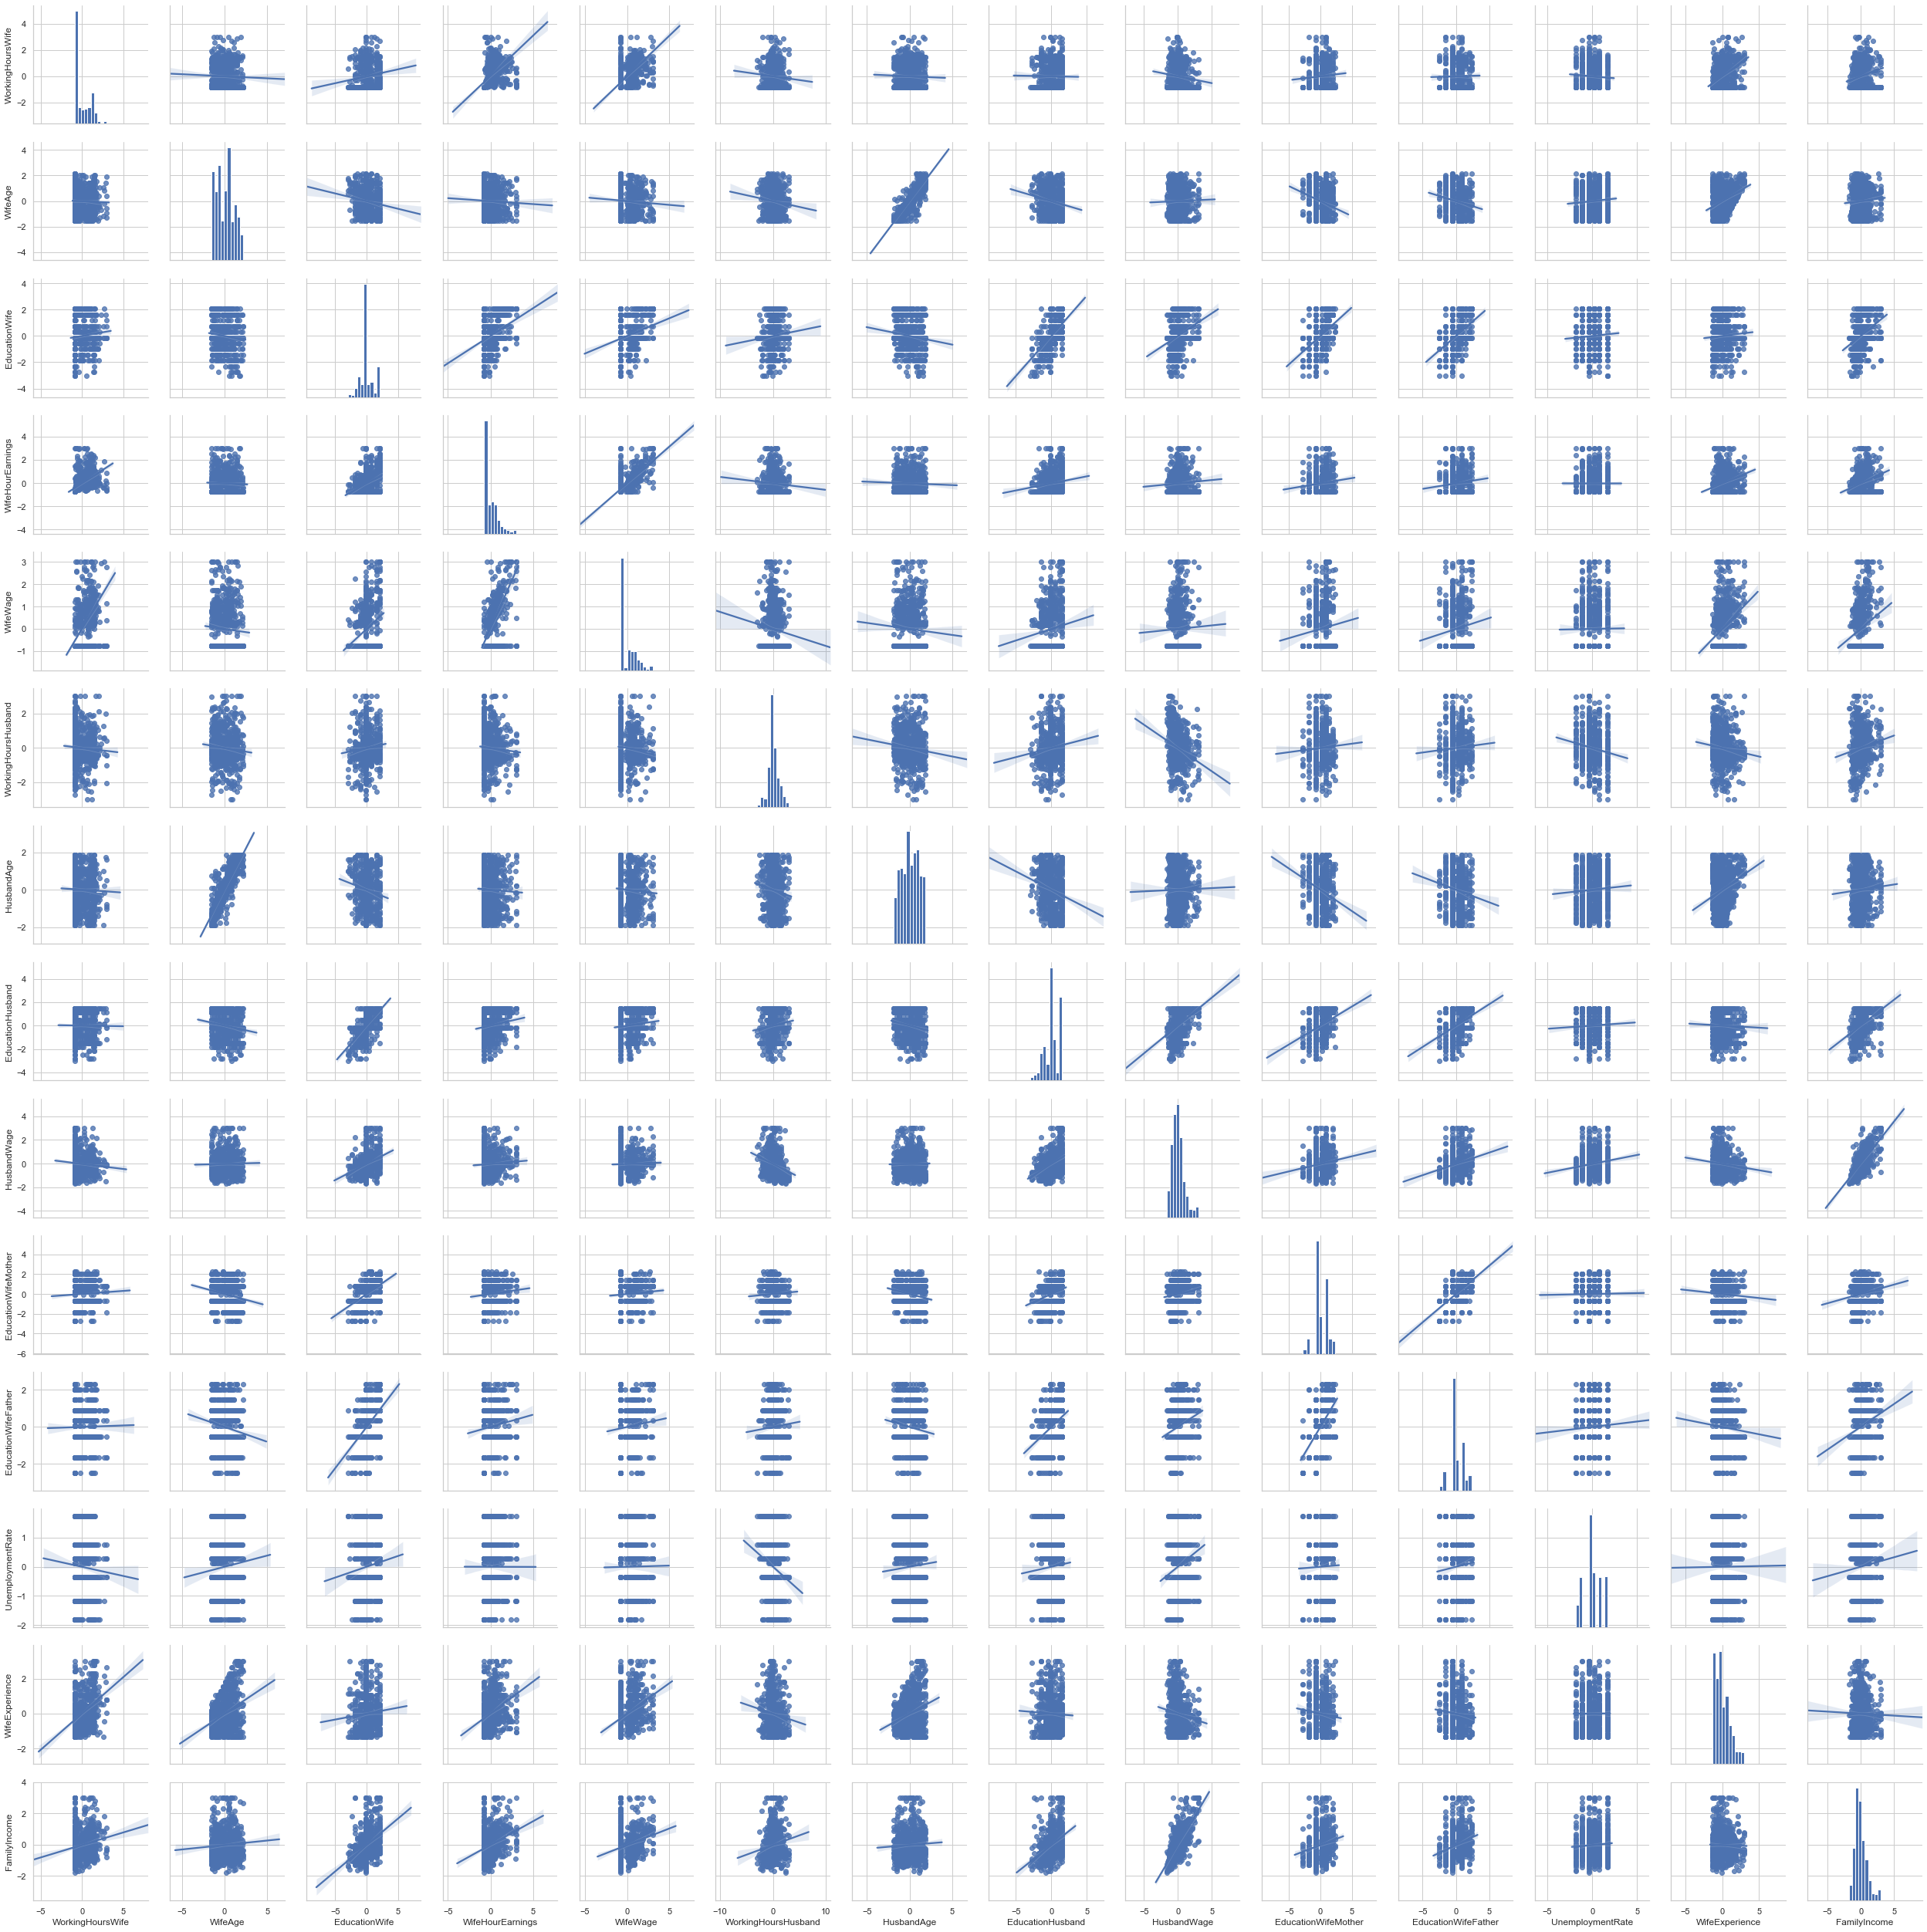

In [22]:
# scatter plot view with regression line to see the relations amongst the variables
sns.pairplot(df,kind='reg')

#### ----------------------------------------------------------------------- 2.1 EDA ENDS -----------------------------------------------------------------------------------------

## 2.2) Is there evidence of multicollinearity? Showcase your analysis

__Background:__ Multicollinearity generally occurs when there are _high correlations between two or more predictor variables_. In other words, one predictor variable can be used to predict the other. This creates redundant information, skewing the results in a regression model. 

An easy way to detect multicollinearity is to calculate correlation coefficients for all pairs of predictor variables. If the correlation coefficient, r, is exactly +1 or -1, this is called perfect multicollinearity. If r is close to or exactly -1 or +1, one of the variables should be removed from the model if at all possible.

If correlation is ZERO (0), it means independent variables are not joining hands to predict dependent variable
If correlation is ONE (1), its difficult to make accurate model.
so anything greater than 0.6 in correlation, considered to be multiconllinearlity.

#### __Some statisticians called "Multicollinearity as a cancer in statistics".__

__Let's now, check the multicollinearity.. (Test of Assumption1: The independent variables should not be correlated)__

In [23]:
# Let us define the X(predictor) and Y(target) variables
X = df.drop("FamilyIncome" , axis=1)
Y = df.pop("FamilyIncome")

In [24]:
# top5 rows
X.head()

,WorkingHoursWife,WifeAge,EducationWife,WifeHourEarnings,WifeWage,WorkingHoursHusband,HusbandAge,EducationHusband,HusbandWage,EducationWifeMother,EducationWifeFather,UnemploymentRate,WifeExperience
0,0.998493,-1.306257,-0.125883,0.302325,0.330924,0.740508,-1.380882,-0.162769,-0.816836,0.816884,-0.506669,-1.164042,0.417818
1,1.051322,-1.554174,-0.125883,-0.304248,0.330924,0.071793,-1.877564,-1.156543,0.226934,-0.668898,-0.506669,0.763443,-0.698285
2,1.423422,-0.934381,-0.125883,0.670109,0.905712,1.352097,-0.635859,-0.162769,-0.922827,0.816884,-0.506669,-1.164042,0.541830
3,-0.326823,-1.058339,-0.125883,-0.394504,0.579034,-0.583481,0.978358,-0.825285,-0.932051,-0.668898,-0.506669,-1.164042,-0.574274
4,0.950258,-1.430215,0.751799,0.684400,0.723765,-0.449066,-1.629223,-0.162769,0.595547,0.816884,1.454161,0.281572,-0.450262


In [25]:
# top5 rows
Y.head()

0   -0.555782
1   -0.105121
2   -0.167508
3   -1.295391
4    0.346361
Name: FamilyIncome, dtype: float64

In [26]:
# let's see the correlation matrix amongst predictor variables
X.corr()

,WorkingHoursWife,WifeAge,EducationWife,WifeHourEarnings,WifeWage,WorkingHoursHusband,HusbandAge,EducationHusband,HusbandWage,EducationWifeMother,EducationWifeFather,UnemploymentRate,WifeExperience
WorkingHoursWife,1.000000,-0.032001,0.107556,0.532376,0.621868,-0.057586,-0.029875,-0.011006,-0.094780,0.060501,0.015667,-0.061543,0.411811
WifeAge,-0.032001,1.000000,-0.119347,-0.039343,-0.058263,-0.089136,0.888138,-0.162992,0.022023,-0.234642,-0.160591,0.077077,0.331510
EducationWife,0.107556,-0.119347,1.000000,0.355758,0.265175,0.080139,-0.133091,0.611036,0.306394,0.435195,0.442929,0.073646,0.068210
WifeHourEarnings,0.532376,-0.039343,0.355758,1.000000,0.736358,-0.064086,-0.034578,0.143171,0.060680,0.107357,0.111233,-0.000744,0.311761
WifeWage,0.621868,-0.058263,0.265175,0.736358,1.000000,-0.075453,-0.054844,0.104878,0.028719,0.083760,0.099719,0.008028,0.346177
WorkingHoursHusband,-0.057586,-0.089136,0.080139,-0.064086,-0.075453,1.000000,-0.102273,0.109777,-0.248159,0.050772,0.054473,-0.158251,-0.101017
HusbandAge,-0.029875,0.888138,-0.133091,-0.034578,-0.054844,-0.102273,1.000000,-0.195488,0.015638,-0.227457,-0.135000,0.053094,0.271453
EducationHusband,-0.011006,-0.162992,0.611036,0.143171,0.104878,0.109777,-0.195488,1.000000,0.424703,0.324139,0.366443,0.054980,-0.036108
HusbandWage,-0.094780,0.022023,0.306394,0.060680,0.028719,-0.248159,0.015638,0.424703,1.000000,0.143401,0.215404,0.169646,-0.119264
EducationWifeMother,0.060501,-0.234642,0.435195,0.107357,0.083760,0.050772,-0.227457,0.324139,0.143401,1.000000,0.573072,0.018402,-0.081021


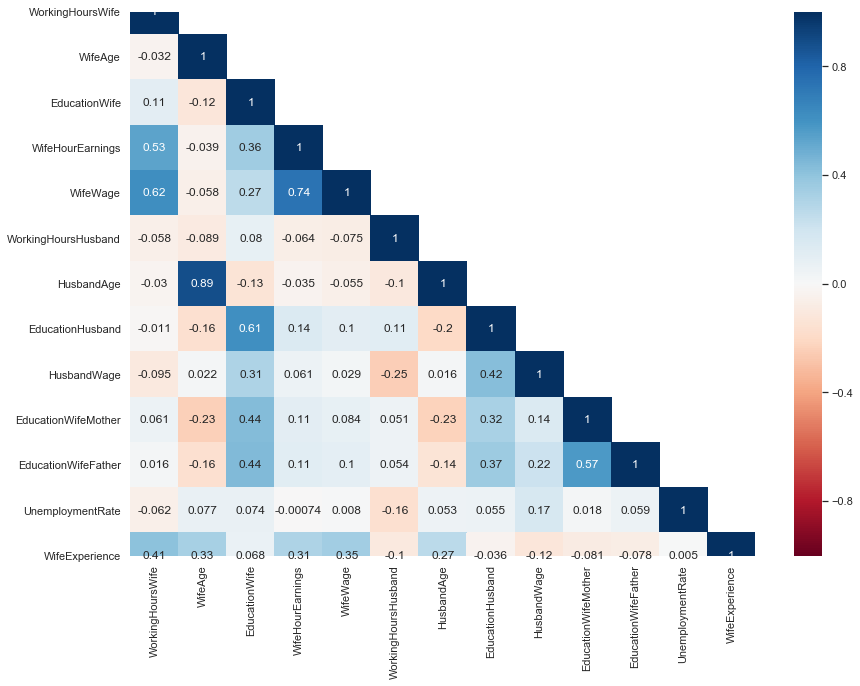

In [27]:
# correlation matrix view using heatmap
plt.figure(figsize=(14,10))
sns.heatmap(X.corr(),annot=True,vmax=1,vmin=-1,cmap='RdBu',mask=np.triu(X.corr(),+1))

__Highly Correlated (correlation value more than 0.6):__
1. HusbandAge and WifeAge (0.89)
2. WifeWage and WifeHourEarnings (0.74)
3. WifeWage and WorkingHoursWife (0.62)
4. EducationHusband and EducationWife (0.61)

### __Conclusion:__ We see that there is __some degree of correlation (multicolinearity) amongst the variables__ in the dataset.

#### ----------------------------------------------------------------------- 2.2 Multicolinearlity ENDS -----------------------------------------------------------------------------------------

## 2.3) Perform Multiple Linear Regression (using the 'statsmodels' library) and comment on the model thus built

As we have already checked assumption1 : no or little multicolinearlity in problem2.2. let's check other assumptions and build the model.

#### Test of Assumption 2: 
__(Linear Relationship means that the dependent variable should be linearly related with the coefficients)__

In [29]:
# This adds the constant term beta0 to the linear regression.
X=sm.add_constant(X)

In [30]:
# model building
model = sm.OLS(Y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           FamilyIncome   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     157.9
Date:                Mon, 11 Jan 2021   Prob (F-statistic):          4.43e-203
Time:                        10:01:05   Log-Likelihood:                -492.50
No. Observations:                 753   AIC:                             1013.
Df Residuals:                     739   BIC:                             1078.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0033      0.017      0.192      0.847      -0.030       0.037
WorkingHoursWife        0.1908      0.024      8.024      0.000       0.144       0.237
WifeAge                 0.0918      0.039      2.373      0.018       0.016       0.168
EducationWife           0.0371      0.025      1.489      0.137      -0.012       0.086
WifeHourEarnings        0.1542      0.031      4.905      0.000       0.092       0.216
WifeWage                0.0174      0.028      0.615      0.539      -0.038       0.073
WorkingHoursHusband     0.3309      0.019     17.240      0.000       0.293       0.369
HusbandAge              0.0199      0.038      0.528      0.598      -0.054       0.094
EducationHusband       -0.0153      0.024     -0.644      0.520      -0.062       0.031
HusbandWage             0.8234      0.023     35.222      0.000       0.778       0.869
EducationWifeMother     0.0167      0.022      0.758      0.449      -0.027       0.060
EducationWifeFather     0.0006      0.022      0.027      0.978      -0.043       0.044
UnemploymentRate       -0.0187      0.018     -1.059      0.290      -0.053       0.016
WifeExperience         -0.0611      0.021     -2.877      0.004      -0.103      -0.019
==============================================================================
Omnibus:                      246.458   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1290.257
Skew:                           1.387   Prob(JB):                    6.67e-281
Kurtosis:                       8.782   Cond. No.                         5.24
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
# using model let's predict the dependent variable (i.e. family income)
ypred = model.predict(X)
print(ypred)

0     -0.321562
1      0.223161
2     -0.017310
3     -1.094675
4      0.547807
         ...   
748    0.482725
749   -1.080802
750   -1.408392
751    0.557799
752   -0.202635
Length: 753, dtype: float64


In [32]:
# add this predicted value in the df dataset.
df['pred'] = ypred

In [33]:
# find out the difference between actual family income value and predicted family income value and add it the df dataset.
df['error'] = Y - ypred
df.head()

,WorkingHoursWife,WifeAge,EducationWife,WifeHourEarnings,WifeWage,WorkingHoursHusband,HusbandAge,EducationHusband,HusbandWage,EducationWifeMother,EducationWifeFather,UnemploymentRate,WifeExperience,pred,error
0,0.998493,-1.306257,-0.125883,0.302325,0.330924,0.740508,-1.380882,-0.162769,-0.816836,0.816884,-0.506669,-1.164042,0.417818,-0.321562,-0.234220
1,1.051322,-1.554174,-0.125883,-0.304248,0.330924,0.071793,-1.877564,-1.156543,0.226934,-0.668898,-0.506669,0.763443,-0.698285,0.223161,-0.328282
2,1.423422,-0.934381,-0.125883,0.670109,0.905712,1.352097,-0.635859,-0.162769,-0.922827,0.816884,-0.506669,-1.164042,0.541830,-0.017310,-0.150198
3,-0.326823,-1.058339,-0.125883,-0.394504,0.579034,-0.583481,0.978358,-0.825285,-0.932051,-0.668898,-0.506669,-1.164042,-0.574274,-1.094675,-0.200717
4,0.950258,-1.430215,0.751799,0.684400,0.723765,-0.449066,-1.629223,-0.162769,0.595547,0.816884,1.454161,0.281572,-0.450262,0.547807,-0.201446


### RMSE in Summary:

The RMSE is the square root of the variance of the residuals. It indicates the __absolute fit of the model to the data–how close the observed data points are to the model’s predicted values.__ 

Whereas R-squared is a relative measure of fit, RMSE is an absolute measure of fit. 

As the square root of a variance, RMSE can be interpreted as the standard deviation of the unexplained variance, and has the useful property of being in the same units as the response variable. __Lower values of RMSE indicate better fit.__ RMSE is a good measure of __how accurately the model predicts the response, and it is the most important criterion for fit if the main purpose of the model is prediction.__

In [34]:
# RMSE and other metrics calculation summary
mae = metrics.mean_absolute_error(Y, ypred)
mse = metrics.mean_squared_error(Y, ypred)
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(Y, ypred)

print("Results of RMSE and other mertics are:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2) 

Results of RMSE and other mertics are:
MAE: 0.3366180973312012
MSE: 0.21658231506885048
RMSE: 0.465384051154367
R-Squared: 0.7353209888439842


#### Test of Assumption 3: 
__(The error terms has a constant variance i.e. they are homoscedastic in nature)__

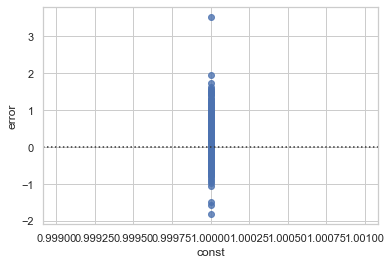

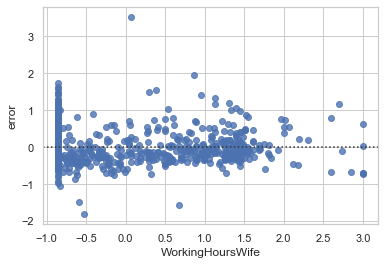

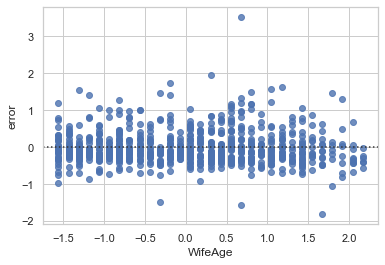

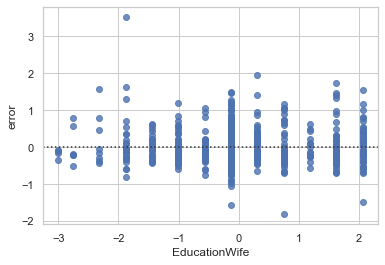

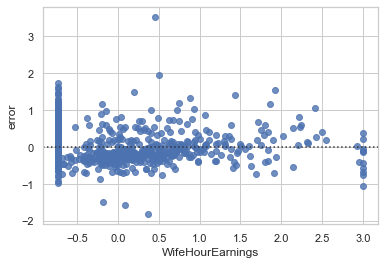

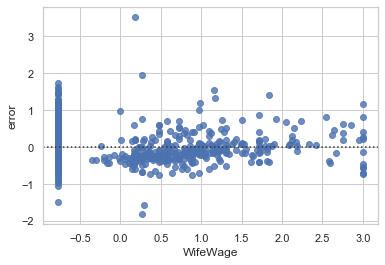

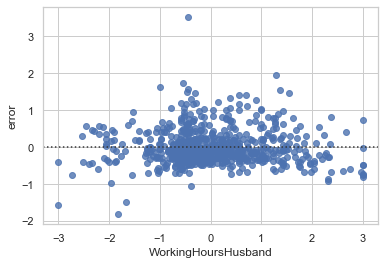

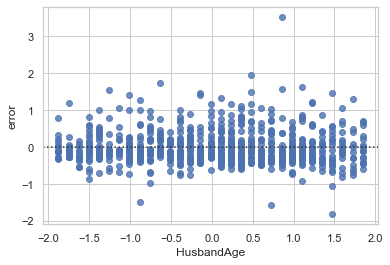

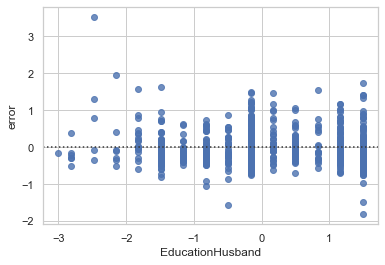

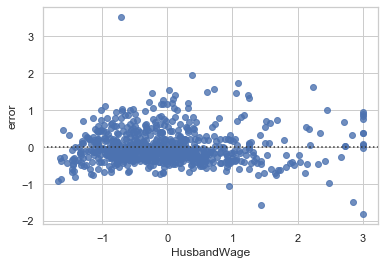

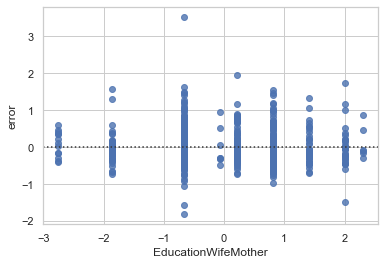

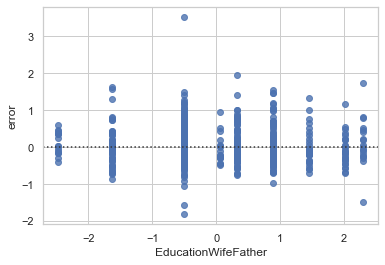

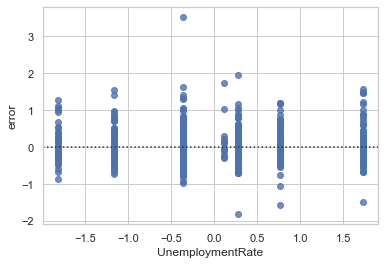

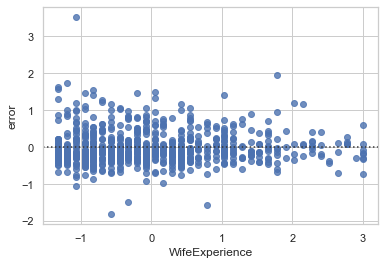

In [35]:
for names in range(0,len(X.columns)):
    sns.residplot(X.iloc[:,names],df['error'])
    plt.show()

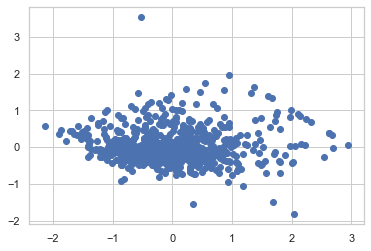

In [36]:
plt.scatter(df['pred'],df['error'])
plt.show()

Here, we see that the Residual Plots does not necessarily follow any particular pattern. Some kind of pattern can be noticed in the residual plot.

#### Test of Assumption 4: 
__There should not be any auto-correlation between the error terms. (One value of the error term should not predict the next value of the error term)__

Here, we notice that there are mix nature in p-value. There are __6 variables__ for which p-values is less than 0.05 but there are __7 variables__ for which p-value is greater than 0.05 but we will not be dropping that variables as intuitively that seems like an important variables.

In [37]:
print('The variation in the dependent variable which is explained by the independent variables is','\n',
      model.rsquared*100,'%')

The variation in the dependent variable which is explained by the independent variables is 
 73.53209888439842 %


If the Durbin-Watson test statistic is very close to 2, we can go ahead and say that there is no autocorrelation. We will not be going into the depth of calculation of the Durbin-Watson test statistic.

The following is the Durbin-Watson test statistic:

# $\frac{\sum_{t=2}^{T}(e_t - e_{t-1})^{2}}
 {\sum_{t=1}^{T}(e_t)^{2}}$

Here, we see that the Durbin-Watson test statistic is close to 2 and thus we can say that this particular assumption of Linear Regression is also verified.

Let us try to find the Durbin-Watson test statstic from the errors that we have calculated before while building the model using the SkLearn library.

In [38]:
import statsmodels

statsmodels.stats.stattools.durbin_watson(df['error'], axis=0)

2.0233858297801355

We see that both the values are same and thus we accept the validity of this particular assumption.

Since, we have predicted the values using the SkLearn library, we are not predicting the values using the statsmodels library overhere.

#### Test of Assumption 5: 
__The errors are assumed to be normally distributed__

Let us check the Shapiro test of normality to check whether the errors are normally distributed.

In [39]:
from scipy.stats import shapiro

In [40]:
shapiro(np.abs(df['error']))

(0.7745586633682251, 6.587832864465893e-31)

Since the p-value is less than $\alpha$ (0.05), we can say that the errors are not normally distributed and this particular assumption does not hold true.

In [41]:
res = model.resid

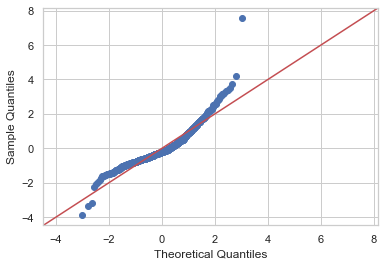

In [42]:
fig = sm.qqplot(res,fit=True,line='45')
plt.show()

We checked the same thing using the QQ plot and we can say that the Residuals (or errors) are __not nomrally distributed.__

### __Final summary (Snapshot):__

There are 13 independent variables and 753 rows in the dataset _(after replacing the outliers zscore value more than 3 or less than -3 with 3 and -3 respectively)_. I have looked at all 5 assumptions to assessed whether model is good to go or not? and found: 

3 out of 5 assumptions __are failing to satisfy__ the model passing requirements. Further,

1.	I have checked __multicollinearity__ and found 4 combinations with high collinearity _(correlation values more than 0.6)_.__(Not Satisfying)__
2.	Also checked __linear relationship__ amongst independent variables and dependent variables are found: __(Not Satisfying)__
    
    a.	R-squared (coefficient of determination) value is __0.735__ which means the variation in the dependent variable which is explained by the independent variables is only 73.5% _(if the R2 value is less than 0.75 than model is considered to be weak)_.
    
    b.	Out of 13 independent variables, __7 variables having p-value more than (α) 0.05__. it means that these variables are not making significant impact on to the dependent variable.
    
    c.	We have RMSE (root mean square error) value for this model is __0.465.__
    
    
3.	__Homoscedasticity__ amongst the errors (residuals) are following the pattern which is required. __(Satisfying)__
4.	Also checked __auto correlations amongst the errors (residuals)__ through Durbin- Watson test and the value were __2.023__ which is in-line with suggested value of between 2 to 2.5. __(Satisfying)__
5.	As per assumption __errors should be normally distributed__. But while using Shapiro’s test found p-value __6.59e-31__ which less than (α) 0.05. hence, errors are not normally distributed. __(Not Satisfying)__

### __Conclusion:__ 

This linear regression model is __not advised to use to predict “family income”__. To predict “family income” some variables should be __dropped or merged__. So, __PCA (principal component analysis)__ is the next option to go with and then reassess the model.


#### ----------------------------------------------------------------------- 2.3 MLR ENDS -----------------------------------------------------------------------------------------

## 2.4) Perform Principal Component Analysis (on the predictor variables) and extract the Principal Components. Comment on the reason behind choosing the number of Principal Components.

__Background:__
    Principal Component Analysis(PCA), is a dimension reduction technique that is often used to __reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one__ that still contains most of the information in the large set.

Reducing the number of variables of a data set naturally comes at the expense of accuracy, but the trick in dimensionality reduction is to trade a little accuracy for simplicity. Because smaller data sets are easier to explore and visualize and make analyzing data much easier and faster for machine learning algorithms without extraneous variables to process.

__So to sum up, the idea of PCA is simple — reduce the number of variables of a dataset, while preserving as much information as possible.__

let's perform PCA step by step

### __Step1: Data Standardisation__
    
__Background:__
The aim of this step is to standardize the range of the continuous variables so that each one of them contributes equally to the analysis.
More specifically, the reason why it is critical to perform standardization prior to PCA, is that the latter is quite sensitive regarding the variances of the initial variables. That is, if there are large differences between the ranges of initial variables, those variables with larger ranges will dominate over those with small ranges (For example, a variable that ranges between 0 and 100 will dominate over a variable that ranges between 0 and 1), which will lead to biased results. So, transforming the data to comparable scales can prevent this problem.

Mathematically, this can be done by subtracting the mean and dividing by the standard deviation for each value of each variable.

# $ Z score = \frac{(value - mean)}
  {stdev.}$


Principal Component Analysis Standardization
Once the standardization is done, all the variables will be transformed to the same scale.

In [43]:
# let's create dataset with name of df_pca based on original dataset(which is already converted into zscore).
df1 = data.copy()
df_pca = df1.drop(['FamilyIncome'],axis = 1)
df_pca.head()

,WorkingHoursWife,WifeAge,EducationWife,WifeHourEarnings,WifeWage,WorkingHoursHusband,HusbandAge,EducationHusband,HusbandWage,EducationWifeMother,EducationWifeFather,UnemploymentRate,WifeExperience
0,0.998493,-1.306257,-0.125883,0.302325,0.330924,0.740508,-1.380882,-0.162769,-0.816836,0.816884,-0.506669,-1.164042,0.417818
1,1.051322,-1.554174,-0.125883,-0.304248,0.330924,0.071793,-1.877564,-1.156543,0.226934,-0.668898,-0.506669,0.763443,-0.698285
2,1.423422,-0.934381,-0.125883,0.670109,0.905712,1.352097,-0.635859,-0.162769,-0.922827,0.816884,-0.506669,-1.164042,0.541830
3,-0.326823,-1.058339,-0.125883,-0.394504,0.579034,-0.583481,0.978358,-0.825285,-0.932051,-0.668898,-0.506669,-1.164042,-0.574274
4,0.950258,-1.430215,0.751799,0.684400,0.723765,-0.449066,-1.629223,-0.162769,0.595547,0.816884,1.454161,0.281572,-0.450262


In [44]:
data_scaled=df_pca
data_scaled.shape

(753, 13)

### __Step2: Covariance Matrix Computation__
    
__Background:__
The aim of this step is to understand how the variables of the input dataset are varying from the mean with respect to each other, or in other words, to see if there is any relationship between them. Because sometimes, variables are highly correlated in such a way that they contain redundant information. So, in order to identify these correlations, we compute the covariance matrix.

The covariance matrix is a p × p symmetric matrix (where p is the number of dimensions) that has as entries the covariances associated with all possible pairs of the initial variables.

It’s actually the sign of the covariance that matters:

if __+ve__ then: the two variables increase or decrease together (correlated)

if __-ve__ then: One increases when the other decreases (Inversely correlated)


Now, that we know that the covariance matrix is not more than a table that summaries the correlations between all the possible pairs of variables. let's perform this step.

In [45]:
## covariance matrix calculation
cov_matrix = np.cov(data_scaled.T)
print('Covariance Matrix \n', cov_matrix)

Covariance Matrix 
 [[ 1.00132979e+00 -3.31582115e-02  1.06101321e-01  4.23506899e-01
   6.07723445e-01 -5.64225183e-02 -3.11300884e-02 -9.66326289e-03
  -9.87300540e-02  5.79406915e-02  1.36890778e-02 -6.03700052e-02
   4.05497226e-01]
 [-3.31582115e-02  1.00132979e+00 -1.20382861e-01 -3.46051004e-02
  -5.83924775e-02 -8.44837698e-02  8.89319009e-01 -1.63266264e-01
   2.70507312e-02 -2.34953587e-01 -1.60804404e-01  7.71793469e-02
   3.34460049e-01]
 [ 1.06101321e-01 -1.20382861e-01  1.00132979e+00  3.18801449e-01
   2.67930359e-01  7.90208661e-02 -1.33699059e-01  6.12767546e-01
   2.85315019e-01  4.35915402e-01  4.43046609e-01  7.22359587e-02
   6.63436673e-02]
 [ 4.23506899e-01 -3.46051004e-02  3.18801449e-01  1.00132979e+00
   6.52507648e-01 -5.99985405e-02 -3.18782667e-02  1.26391585e-01
   6.13711932e-02  9.04253051e-02  9.86077958e-02 -1.27896664e-04
   2.50913296e-01]
 [ 6.07723445e-01 -5.83924775e-02  2.67930359e-01  6.52507648e-01
   1.00132979e+00 -7.08913431e-02 -5.54725311e

### __Step3: Compute Eigen vectors and Eigen values of the Cov. matrix to identify Principal Components__
    
__Background:__
Eigenvectors and eigenvalues are the linear algebra concepts that we need to compute from the covariance matrix in order to determine the principal components of the data.

Principal components are new variables that are constructed as linear combinations or mixtures of the initial variables. These combinations are done in such a way that the new variables (i.e., principal components) are uncorrelated and most of the information within the initial variables is squeezed or compressed into the first components. 

So, the idea is 10-dimensional data gives you 10 principal components, but PCA tries to put maximum possible information in the first component, then maximum remaining information in the second and so on, until having something like shown in the scree plot below.

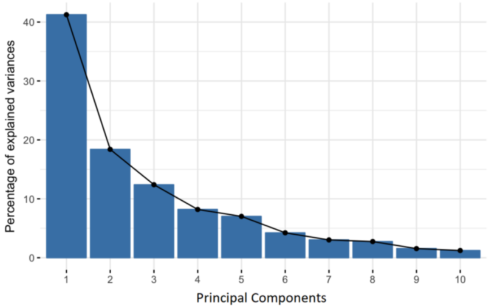

Organizing information in principal components this way, will allow you to reduce dimensionality without losing much information, and this by discarding the components with low information and considering the remaining components as your new variables.

An important thing to realize here is that, the principal components are less interpretable and don’t have any real meaning since they are constructed as linear combinations of the initial variables.

__Principal components represent the directions of the data that explain a maximal amount of variance, that is to say, the lines that capture most information of the data.__

_To put all this simply, just think of principal components as new axes that provide the best angle to see and evaluate the data, so that the differences between the observations are better visible._

__Eigen Vectors and Eigen Values:__

Now that we understood what we mean by principal components, let’s go back to eigenvectors and eigenvalues. What we firstly need to know about them is that __they always come in pairs, so that every eigenvector has an eigenvalue.__ _Their number is equal to the number of dimensions of the data_. 

For example, for a 3-dimensional data set, there are 3 variables, therefore there are 3 eigenvectors with 3 corresponding eigenvalues.

__Very Important:__ The eigenvectors of the cov. matrix are actually _"the directions of the axes where there is the most variance(most information) and that we call Principal Components"._ The eigenvalues are simply _"the coefficients attached to eigenvectors, which give the amount of variance carried in each Principal Component"._

By ranking your eigenvectors in order of their eigenvalues, highest to lowest, you get the principal components in order of significance.

__Example to understand eigen value and eigen vector in simple way:__

Take 2-dimensional dataset with 2 variables _x,y_ and that the eigenvectors and eigenvalues of the covariance matrix are as follows:

Principal Component Analysis Example
If we rank the eigenvalues in descending order, we get λ1>λ2, which means that the eigenvector that corresponds to the first principal component (PC1) is v1 and the one that corresponds to the second component (PC2) isv2.

After having the principal components, to compute the percentage of variance (information) accounted for by each component, we divide the eigenvalue of each component by the sum of eigenvalues. If we apply this on the example above, we find that PC1 and PC2 carry respectively 96% and 4% of the variance of the data.

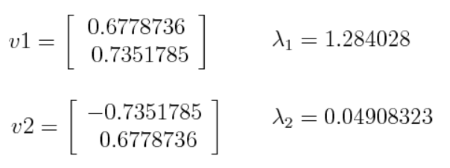

#### Now, let's put all the information what we understood in the theory above, apply the same in the given dataset.

In [46]:
# method to get the eigen value and eigen vectors for the cov. matrix details
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors: \n', eig_vecs)
print('\n Eigen Values: \n', eig_vals)

Eigen Vectors: 
 [[-0.17742383  0.42818966  0.27289732 -0.01800772  0.10248336 -0.04906251
  -0.02140832  0.16921007 -0.5533919  -0.38195272 -0.14860013 -0.43375229
  -0.07761001]
 [ 0.2686461   0.32073721 -0.46948303  0.24081122  0.00652029 -0.01636776
  -0.71604282 -0.12039671 -0.01878517  0.00937483  0.06594523 -0.1174905
   0.02087811]
 [-0.44361296  0.02791376 -0.21775337  0.14759737 -0.16389846  0.10670115
  -0.00704313  0.07993251  0.37441051  0.06785842 -0.68811238 -0.26211575
   0.03935585]
 [-0.2760925   0.38312234  0.13260116 -0.08785453 -0.15014214  0.05824887
  -0.00248872 -0.50545136  0.34121163 -0.48969245  0.16968773  0.24980465
   0.15114727]
 [-0.27877776  0.43697551  0.20093792 -0.09615522 -0.04139521  0.05283352
  -0.01433441 -0.2293794  -0.0947791   0.76645265  0.12449233 -0.00541794
  -0.1114797 ]
 [-0.03355309 -0.13593613  0.16562636  0.65079552 -0.23533967  0.49972219
   0.01506437 -0.13060046 -0.35680902  0.00489237 -0.05394212  0.23643394
   0.14453663]
 [ 0.2

__Now, Let's print the first eigen vectors.__

In [47]:
print('The first eigen vector is:')
counter = 0
for i in range(0,len(eig_vecs[0])):
    counter = counter+1
    if(counter != (len(eig_vecs[0]))):
        print(np.around(eig_vecs[0,i],2),'*',df_pca.columns[i],"+")
    else:
        print(np.around(eig_vecs[0,i],2),'*',df_pca.columns[i])

The first eigen vector is:
-0.18 * WorkingHoursWife +
0.43 * WifeAge +
0.27 * EducationWife +
-0.02 * WifeHourEarnings +
0.1 * WifeWage +
-0.05 * WorkingHoursHusband +
-0.02 * HusbandAge +
0.17 * EducationHusband +
-0.55 * HusbandWage +
-0.38 * EducationWifeMother +
-0.15 * EducationWifeFather +
-0.43 * UnemploymentRate +
-0.08 * WifeExperience


__Now, Let's calculate the variance explained by eigen values and the cumulative variance by the eigen values.__

In [48]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
var_exp_formated = list(np.around(np.array(var_exp),2))
print('The variance explained by each of eigen values in order is: '
      ,var_exp_formated)

The variance explained by each of eigen values in order is:  [22.91, 18.52, 13.72, 9.49, 7.14, 6.61, 5.31, 4.15, 3.39, 3.23, 2.49, 2.23, 0.82]


In [50]:
cum_var_exp = list(np.around(np.array(np.cumsum(var_exp)),2))
print("Cumulative Variance Explained:", cum_var_exp)

Cumulative Variance Explained: [22.91, 41.43, 55.14, 64.63, 71.78, 78.38, 83.69, 87.84, 91.23, 94.46, 96.95, 99.18, 100.0]


#### Let's plot the variance explained by each eigen value with the eigen value.

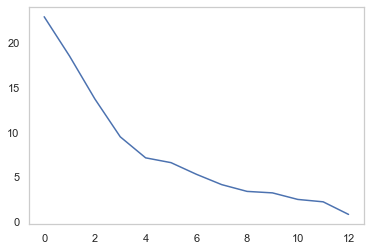

In [51]:
plt.plot(var_exp)
plt.grid()

#### Next step is to plot of eigen values with the number of factors or Principal Components

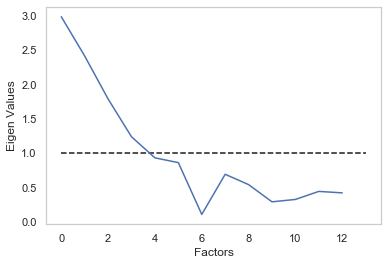

In [52]:
plt.plot(range(0,13),eig_vals)
plt.grid()
plt.ylabel('Eigen Values')
plt.xlabel('Factors')
plt.hlines(y=1,xmin=0,xmax=13,linestyles='dashed');

In [53]:
# eigen value is more than one 
print('From the above plot, we can see that the no of components that we can probably take is 5' 
      ,'(refer eigen values more than .9).','\n'
      'We also see that if we take 5 components the total amount of variance explained is',cum_var_exp[4],'%')

From the above plot, we can see that the no of components that we can probably take is 5 (refer eigen values more than .9). 
We also see that if we take 5 components the total amount of variance explained is 71.78 %


#### Let's plot one more graph with both the variance explained by each eigen value and the cumulative variance explained.

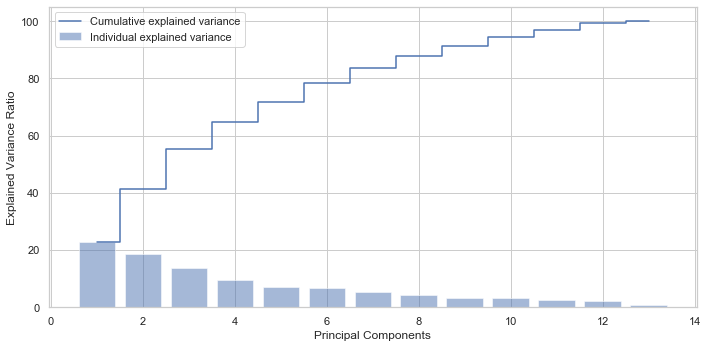

In [54]:
# Pareto plot chart
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

### __Step4:  Calculate Principal Components__
    
__Background:__
In the previous steps, apart from standardization, we do not make any changes on the dataset, we have just selected the principal components and form the feature vector, but the input dataset remains always in terms of the original axes 
(i.e, in terms of the initial variables).

In this step, which is the last one, the aim is to use the feature vector formed using the eigenvectors of the covariance matrix, to reorient the data from the original axes to the ones represented by the principal components.(hence the name Principal Components Analysis).

__Below is the most used method to find principal components.__

In [55]:
from statsmodels.multivariate.pca import PCA

In [56]:
# run PCA
pca = PCA(data_scaled, 
         ncomp=5,
         standardize=True,  
         missing=None,
        method='eig')

In [57]:
df_comp = pca.loadings.T
df_comp

,WorkingHoursWife,WifeAge,EducationWife,WifeHourEarnings,WifeWage,WorkingHoursHusband,HusbandAge,EducationHusband,HusbandWage,EducationWifeMother,EducationWifeFather,UnemploymentRate,WifeExperience
comp_0,-0.177424,0.268646,-0.443613,-0.276092,-0.278778,-0.033553,0.271126,-0.390302,-0.196630,-0.375744,-0.371109,-0.032692,-0.002222
comp_1,0.428190,0.320737,0.027914,0.383122,0.436976,-0.135936,0.309796,-0.101359,-0.056855,-0.132936,-0.113332,0.014807,0.465379
comp_2,0.272897,-0.469483,-0.217753,0.132601,0.200938,0.165626,-0.459676,-0.252043,-0.418032,-0.099204,-0.199590,-0.268341,-0.032294
comp_3,-0.018008,0.240811,0.147597,-0.087855,-0.096155,0.650796,0.240164,0.079821,-0.375879,0.204903,0.204439,-0.417127,0.127637
comp_4,-0.102483,-0.006520,0.163898,0.150142,0.041395,0.235340,-0.031756,0.402812,0.378446,-0.491863,-0.431441,-0.376111,-0.083269


In [58]:
#save component details into disk fo further review
df_comp.to_excel("PCA_component.xlsx")

### __Final summary (Snapshot):__

Based on the __eigen values__ greater than __0.9__, there are __5 components__ which are considered for the PCA. Further, these 5 components are explaining __~72%__ of the total variances.

In nutshell, we have reduced dimension from __13 variables to 5 components__. 

Further, the grouping of the components based on the loading values are mentioned below:

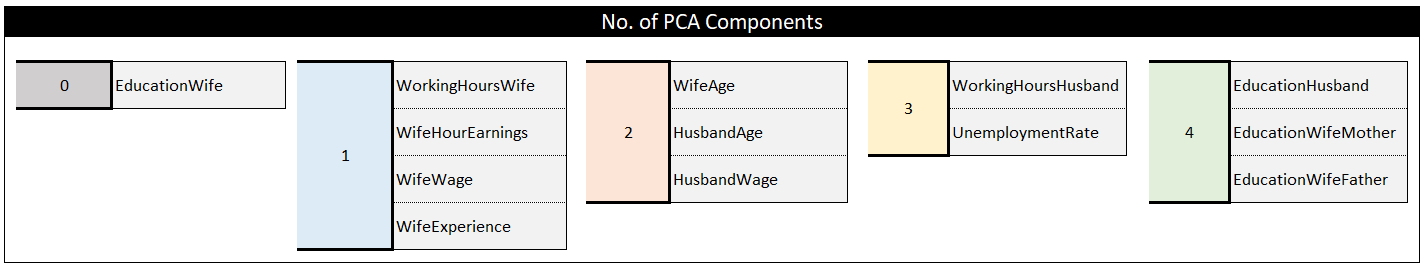

#### ----------------------------------------------------------------------- 2.4 No. of PCA ENDS -----------------------------------------------------------------------------------------

## 2.5) Perform Multiple Linear Regression with 'FamilyIncome' as the dependent variable and the Principal Components extracted as the independent variables.

Now, as we have completed dimension reduction through PCA and found __5 components__. Let's consider these __5 components as an independent variable__ and __"FamilyIncome" as dependent variable__ to perform Multiple linear regression

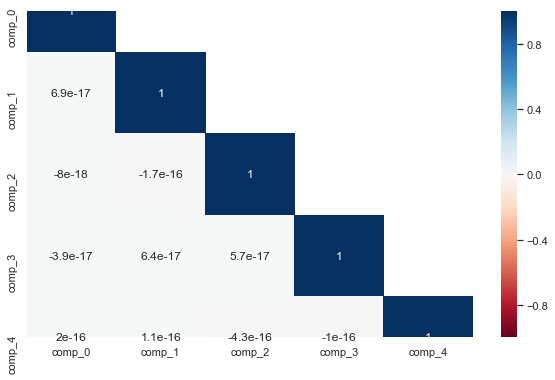

In [59]:
# heatmap view
plt.figure(figsize=(10,6))
sns.heatmap(pca.factors.corr(),annot=True,vmax=1,vmin=-1,cmap='RdBu',mask=np.triu(pca.factors.corr(),+1))

In [60]:
## take out the pca components as a dataset and name it as df_reduced_dimension
df_reduced_dimension = pca.factors
df_reduced_dimension.head()

,comp_0,comp_1,comp_2,comp_3,comp_4
0,-0.019107,-0.001738,0.067640,0.020916,0.000299
1,-0.005178,-0.015930,0.058042,-0.054033,-0.005109
2,-0.019851,0.019512,0.065041,0.041485,0.004189
3,0.022086,-0.000003,0.028621,0.000746,0.006209
4,-0.055158,-0.009212,0.028315,-0.033167,-0.031157


In [61]:
# 13 variables are clubbed into 5 components with all 753 rows (This we will use as a input for linear regression model)
# factor score matrix
X_factors = pca.factors
X_factors

,comp_0,comp_1,comp_2,comp_3,comp_4
0,-0.019107,-0.001738,0.067640,0.020916,0.000299
1,-0.005178,-0.015930,0.058042,-0.054033,-0.005109
2,-0.019851,0.019512,0.065041,0.041485,0.004189
3,0.022086,-0.000003,0.028621,0.000746,0.006209
4,-0.055158,-0.009212,0.028315,-0.033167,-0.031157
...,...,...,...,...,...
748,-0.011036,-0.043570,-0.018679,0.023769,0.023900
749,-0.012681,-0.042950,0.026546,-0.000932,-0.041150
750,0.030714,-0.028260,0.021012,0.017246,0.005202
751,0.025802,0.008736,-0.083174,-0.017224,-0.075196


In [63]:
# add constant value to the dataset
X_pca = sm.add_constant(X_factors)
X_pca.head()

,const,comp_0,comp_1,comp_2,comp_3,comp_4
0,1.0,-0.019107,-0.001738,0.067640,0.020916,0.000299
1,1.0,-0.005178,-0.015930,0.058042,-0.054033,-0.005109
2,1.0,-0.019851,0.019512,0.065041,0.041485,0.004189
3,1.0,0.022086,-0.000003,0.028621,0.000746,0.006209
4,1.0,-0.055158,-0.009212,0.028315,-0.033167,-0.031157


In [64]:
# do the data standardisation using z score for dependent variable
from scipy.stats import zscore

Y1 = pd.DataFrame(Y)
Y_pca = Y1.apply(zscore)
Y_pca.head()

,FamilyIncome
0,-0.589500
1,-0.091306
2,-0.160273
3,-1.407118
4,0.407795


In [65]:
type(Y_pca)

pandas.core.frame.DataFrame

In [66]:
model = sm.OLS(Y_pca,X_pca).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           FamilyIncome   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.451
Method:                 Least Squares   F-statistic:                     124.5
Date:                Mon, 11 Jan 2021   Prob (F-statistic):           7.80e-96
Time:                        10:11:31   Log-Likelihood:                -840.22
No. Observations:                 753   AIC:                             1692.
Df Residuals:                     747   BIC:                             1720.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.388e-17      0.027   5.14e-16      1.000      -0.053       0.053
comp_0       -11.8976      0.741    -16.046      0.000     -13.353     -10.442
comp_1         2.8503      0.741      3.844      0.000       1.395       4.306
comp_2        -9.5009      0.741    -12.813      0.000     -10.957      -8.045
comp_3        -1.5730      0.741     -2.121      0.034      -3.029      -0.117
comp_4         9.9943      0.741     13.479      0.000       8.539      11.450
==============================================================================
Omnibus:                      180.407   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              538.598
Skew:                           1.166   Prob(JB):                    1.11e-117
Kurtosis:                       6.425   Cond. No.                         27.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
# prediction value for dependent pca variable
y_pca_pred = model.predict(X_pca)
print(y_pca_pred)

0     -0.450180
1     -0.501317
2     -0.349539
3     -0.473820
4      0.101747
         ...   
748    0.386060
749   -0.633555
750   -0.620732
751   -0.216293
752   -0.537363
Length: 753, dtype: float64


In [68]:
# actual value of dependent variable
Y_actual = Y_pca.iloc[:,0]
print(Y_actual)

0     -0.589500
1     -0.091306
2     -0.160273
3     -1.407118
4      0.407795
         ...   
748    0.489466
749   -1.162105
750   -1.166461
751    0.197628
752    0.504258
Name: FamilyIncome, Length: 753, dtype: float64


In [69]:
# residual/error calculation
y_pca_error = Y_actual - y_pca_pred
y_pca_error

0     -0.139320
1      0.410012
2      0.189266
3     -0.933298
4      0.306049
         ...   
748    0.103406
749   -0.528550
750   -0.545728
751    0.413922
752    1.041621
Length: 753, dtype: float64

In [70]:
# RMSE and other metrics calculation summary
mae_pca = metrics.mean_absolute_error(Y_actual, y_pca_pred)
mse_pca = metrics.mean_squared_error(Y_actual, y_pca_pred)
rmse_pca = np.sqrt(mse_pca) # or mse**(0.5)  
r2_pca = metrics.r2_score(Y_actual, y_pca_pred)

print("Results of RMSE and other mertics are:")
print("MAE_pca:",mae_pca)
print("MSE_pca:", mse_pca)
print("RMSE_pca:", rmse_pca)
print("R-Squared_pca:", r2_pca) 

Results of RMSE and other mertics are:
MAE_pca: 0.5397810411614479
MSE_pca: 0.5454119799974778
RMSE_pca: 0.7385201283631191
R-Squared_pca: 0.4545880200025222


### Communality:

__Background:__

In PCA and Factor Analysis, a variable’s communality is a useful measure __for predicting the variable’s value.__ Communality may be denoted as h2. More specifically,__it tells you what proportion of the variable’s variance is a result of either:_

1. The principal components or,

2. The correlations between each variable and individual factors.

A variable’s communality ranges from 0 to 1.In general, one way to think of communality is as the proportion of common variance found in a particular variable.

In [71]:
## get the communatlity value for each variable
print('Communality Values for each variables:')

for i in range(13):
    communality = df_comp.iloc[:,i]
    h2 = (np.sum(np.square(communality)))
    print(df_comp.columns[i], ':', np.around(h2,2))

Communality Values for each variables:
WorkingHoursWife : 0.3
WifeAge : 0.45
EducationWife : 0.29
WifeHourEarnings : 0.27
WifeWage : 0.32
WorkingHoursHusband : 0.53
HusbandAge : 0.44
EducationHusband : 0.39
HusbandWage : 0.5
EducationWifeMother : 0.45
EducationWifeFather : 0.42
UnemploymentRate : 0.39
WifeExperience : 0.24


#### ----------------------------------------------------------------------- 2.5 MLR after PCA ENDS -----------------------------------------------------------------------------------------

## 2.6) Comment on the Model thus built using the Principal Components and with 'FamilyIncome'.

### Final summary (Snapshot):

To run MLR model after PCA, these are the things have been taken into considerations. I have taken no. components identified during problem2.4 __(i.e., 5) as an independent variable.__ Took __“FamilyIncome”__ as a dependent variable where _performed data standardisation (using z-score) so that independent and dependent variables will be on a same scale_ before running the model.

There are __753 rows__ in the dataset. _(replaced the outliers with 3 and -3, where zscore value more than 3 and less than -3 respectively)_ 

After running the model mentioned below are the __observations__ sighted:

1.	__R2 value__ has drastically __reduced__ from __73.5% (model before PCA)__ to __45.5% (model after PCA)__ which means _before PCA due multicollinearity we had inflated R2 value._

2.	__RMSE score__ has __increased__ from __0.465 (model before PCA)__ to __0.739 (model after PCA)__ which means _after PCA, predicted value and observed value having more residuals._

3.	__Prob (F-statistic)__ value is __7.80e-96__ which is less than 0.5 means the model is _still significant._


4.	__Durbin-Watson__ value is __~2(1.972)__ which is in line with the benchmark value (i.e., 2 to 2.5) means _no auto correlation between errors._

5.	__All 5 components have p-value less than (α) 0.05.__ _It means they are significant and all the components are adding significance to the model._

6.	Out of 5 components, __3 components__ having __-ve__ coefficient relation. Which means _if component value increases then the dependent variable decreases._

7.	__Communality (h2)__ value for each variable is __very minimal__. _Highest Communality (h2) value is 0.45 (WifeAge) which is still very less._

### Conclusion: 

After applying all the concept what i learned from Advanced Statistics class, I came to the conclusion that __this model is WEAK.__ We may need to use __other Data Mining techniques to improve the accuracy of the model.__ 


#### --------------------------------------------------------------- 2.6 Comments on MLR after PCA ENDS -----------------------------------------------------------------------------

## 2.7) Mention the business implication and interpretation of the models.


In this case study, I have performed multiple linear regression (MLR) and assessed the model and found the result is not significant. Hence, went for principal component analysis (PCA) to do the dimension reduction and improve the significance of the independent variables in the dataset. After PCA, I reran the MLR model and found that though the components are significant in the dataset but still R2 value has reduced drastically. Hence, I have concluded the model is WEAK and we should not procced to use it in the production environment. Now the question is:

I.	if I will not do any further changes in the model and deploy the same in the production environment what will be the implications I would face and,

II.	if we want to improve the model accuracy (i.e., improve R2 value) what are the changes I need to be do.

Let’s see both the above scenarios in summary:

__Key Implications:__

•	As model __accuracy is less__ predict the “FamilyIncome” as after using PCA, model shows that only 45 percent of the variability can be explained by the independent variables. If we go back and eliminate the PCA part and use the first iteration MLR still, model shows that only 73 percent of the variability can be explained by the independent variables. It will also impact the “End user performance” where based on “FamilyIncome” they are planning to cast their advertisement, insurance policy categorisation, family segmentation etc...

•	It will impact the __“Time and Cost perspective”__ as non-significant variables are getting captured. (we might need to pay third party to get such variables to perform this research)

•	It will impact on the __“Company image”__ who is doing research (if it is third party) and their agreement with the end users will get impacted. 

__Key Changes to improve the accuracy of the model:__

•	In the existing dataset, sighted 3 columns __“WorkingHoursWife, WifeHourEarnings & WifeWage”in which “ZERO” values__ found in 325, 325 and 417 rows respectively. Further, __~40% (315 out of 753) of the dataset__, all these three columns have value as “ZERO”. As, these columns are significant we need to relook the samples and ensure all the variables must have data relatively. _(refer below graph)_

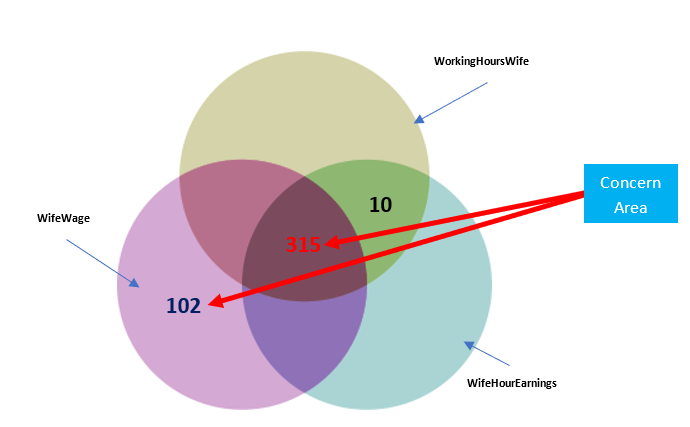

•	Add __“new variables”__ in the dataset which are significant to the dependent variable (i.e., family income) and __“drop non-significant variables”__. There are certain independent variables like “EducationWifeMother, EducationWifeFather” are not making significance impact. Hence, excluding such variables and adding relevant variables into the dataset will improve the accuracy of the model.

•	Reperform the all 5 assumptions and assess the accuracy of the model and based on result of the model perform PCA or other data mining techniques to increase the accuracy of the model and then deploy the same in the production environment.


#### --------------------------------------------------------------- 2.7 Business Implications -----------------------------------------------------------------------------